# Lab Assignment 2

## Breast Cancer Prediction
**1.** Predict Breast Cancer using Feed forward neural network of configuration Nx128x64x32x16x1 and evaluated performance of momemntum, Adagrad, RMSprop, and Adam optimizers in terms of accuracy and F1-score.

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras import models, layers

In [3]:
df = pd.read_csv("data/BreastCancerData.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

In [6]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df=df.drop(columns=['Unnamed: 32','id'])

In [8]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis'>

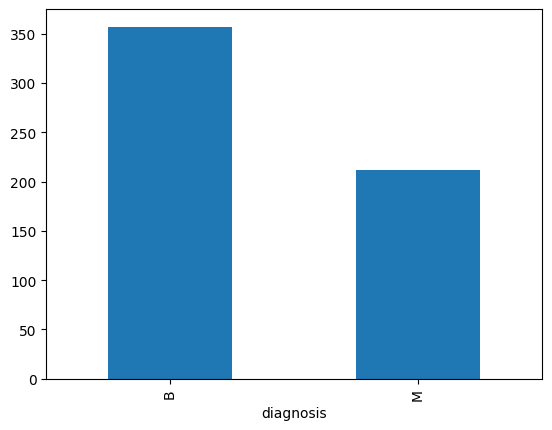

In [9]:
df['diagnosis'].value_counts().plot(kind='bar')

In [10]:
encoder = LabelEncoder()

In [11]:
encoded_diagnosis = encoder.fit_transform(df['diagnosis'])

In [12]:
df['encoded_diagnosis']=encoded_diagnosis

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,encoded_diagnosis
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [14]:
df=df.drop(columns=['diagnosis'])

In [15]:
X=df.drop(columns=['encoded_diagnosis'])
y=df[['encoded_diagnosis']]

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
def create_model():
    model = models.Sequential()
    model.add(layers.Dense(128, activation='relu', input_shape=(30,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

In [18]:
optimizers = ['sgd', 'adagrad', 'rmsprop', 'adam']
results = []

for optimizer in optimizers:
    model = create_model()
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_class = (y_pred > 0.5).astype(int)
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    
    results.append({'Optimizer': optimizer, 'Accuracy': accuracy, 'F1-score': f1})

4/4 [==============================] - 0s 5ms/step


In [19]:
results_df = pd.DataFrame(results)
results_df

,Optimizer,Accuracy,F1-score
0,sgd,0.622807,0.000000
1,adagrad,0.929825,0.900000
2,rmsprop,0.947368,0.926829
3,adam,0.912281,0.893617


From the result above we can see that the `rmsprop` optimizer performed best on the basis of F1-score and Accuracy

## News Category Classification
**2.** Predict class label to predict news category using Feed forward neural network of configuration Nx256x128x64x32x16xo and evaluatd performance of momemntum, Adagrad, RMSprop, and Adam optimizers in terms of accuracy and F1-score.

There are four distinct sections where each story may fall in to. The Sections are labelled as follows : 
* Politics: 0 
* Technology: 1 
* Entertainment: 2 
* Business: 3

In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [21]:
df=pd.read_csv("data/NewsData.csv",encoding='latin')

In [22]:
df.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ...",1
4,"In global markets, gold prices edged up today ...",3


<Axes: xlabel='SECTION'>

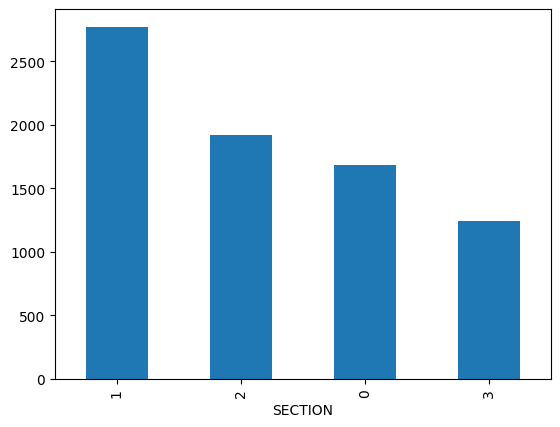

In [23]:
df['SECTION'].value_counts().plot(kind='bar')

In [24]:
X=df['STORY'].values
y=df['SECTION'].values

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
labels = tf.keras.utils.to_categorical(y_train, num_classes=4)

In [27]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(X_train)

In [28]:
# Pad sequences to a fixed length
max_sequence_length = 10  # maximum length of a sequence
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [29]:
def create_model():
    model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(len(word_index) + 1, 256, input_length=max_sequence_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
    ])
    return model

In [31]:
optimizers = ['sgd', 'adagrad', 'rmsprop', 'adam']
results = []

for optimizer in optimizers:
    model = create_model()
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(padded_sequences, labels, epochs=10, batch_size=32, verbose=0)
    
    test_sequences = tokenizer.texts_to_sequences(X_test)
    test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
    # Predict on the test set
    y_pred = model.predict(test_padded_sequences)
    y_pred_class=[]
    for item in y_pred:
        temp = np.argmax(item)
        y_pred_class.append(temp)
    # Calculate accuracy and F1-score
    accuracy = accuracy_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class,average='macro')
    
    results.append({'Optimizer': optimizer, 'Accuracy': accuracy, 'F1-score': f1})

48/48 [==============================] - 1s 14ms/step


In [32]:
results_df = pd.DataFrame(results)
results_df

,Optimizer,Accuracy,F1-score
0,sgd,0.359764,0.135899
1,adagrad,0.359764,0.132289
2,rmsprop,0.699869,0.681804
3,adam,0.748362,0.735969


For News Classification `adam` performed better. 